Welcome to the Emergency Response Monte-Carlo Simulation. You will have to configure the city
in terms of its dimensions, populations, probability of each intensity type occurring in the 5-point emergency
intensity scale (depending on the nature of the city you are designing), and the locations of the emergency
unit buildings within the city
First, you will need to configure the city width and height in terms of the zone unit, where each zone
represents a 3X3 square consisting of 9 coordinates
Enter the width of the city in terms of number of zones: 2
Enter the height of the city in terms of number of zones: 2
Now, configure the population of each zone column-wise, assuming that the population is uniformly
distributed within each zone.
Enter the population of zone 0: 4500
Enter the population of zone 1: 3000
Enter the population of zone 2: 2000
Enter the population of zone 3: 900
Now, configure the probability of each intensity type of, given that an emergency has occurred -
with inten

ValueError: too many values to unpack (expected 2)

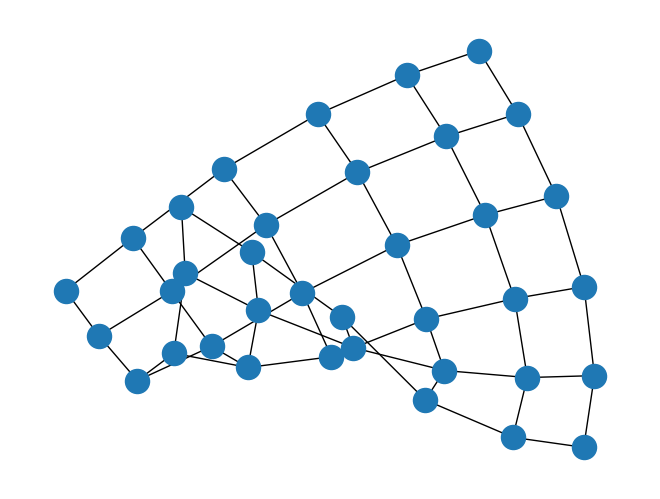

In [1]:
import main
import pandas as pd
import networkx as nx
from EmergencyUnit import EmergencyUnit

city = main.configure_city()
units = EmergencyUnit.response_buildings
unit_locs = [unit.location for unit in units]
labels = dict()
node_coordinates=city.city_graph.nodes
for node in node_coordinates:
    if node in unit_locs:
        labels[node] = 'Emergency Unit'
nx.draw(city.city_graph)
edge_labels = nx.get_edge_attributes(city.city_graph,'adjusted_time')
nx.draw_networkx_edge_labels(city.city_graph,node_coordinates,edge_labels=edge_labels)
nx.draw_networkx_labels(city.city_graph, node_coordinates, labels, font_size=16, font_color='r')
a, b = main.simulate(city)
df1 = pd.DataFrame({'Average Response Time': a})
df1.plot()
df2 = pd.DataFrame({'Percentage of Successfully Responded Emergencies': b})
df2.plot()
# for avg in aggregate_resp_times:
#     print(avg)